# MLFlow

## Teoría

MLFlow es una plataforma de código abierto para gestionar el ciclo de vida de los proyectos de Machine Learning. Su funcionalidad incluye:

* Tracking: Registro de experimentos, métricas, parámetros y artefactos.
* Projects: Estructuración del código en un formato reutilizable.
* Models: Gestión y despliegue de modelos.
* Registry: Registro centralizado de modelos.

En este Workshop, nos enfocaremos en MLFlow Tracking para registrar y analizar experimentos.

Algunos conceptos clave son:

* Experiment: Agrupación de varios runs para un problema particular.
* Run: Ejecución de un experimento que puede ser trackeado.
* Metrics: Métricas de rendimiento como accuracy, loss, etc.
* Parameters: Parámetros de configuración de modelos.
* Artifacts: Archivos generados como modelos, gráficos, etc.
* MLFlow UI: Interfaz gráfica para explorar experimentos.

### MLFlow Experiment

El concepto más básico en MLFlow es el experimento, el cual es una manera en la que MLFlow organiza el seguimiento de las ejecuciones del entrenamiento del modelo.

Cuando empezamos a hacer el seguimiento, debemos especificar cuál experimento usaremos, así sabemos dónde encontrar los datos más tarde.

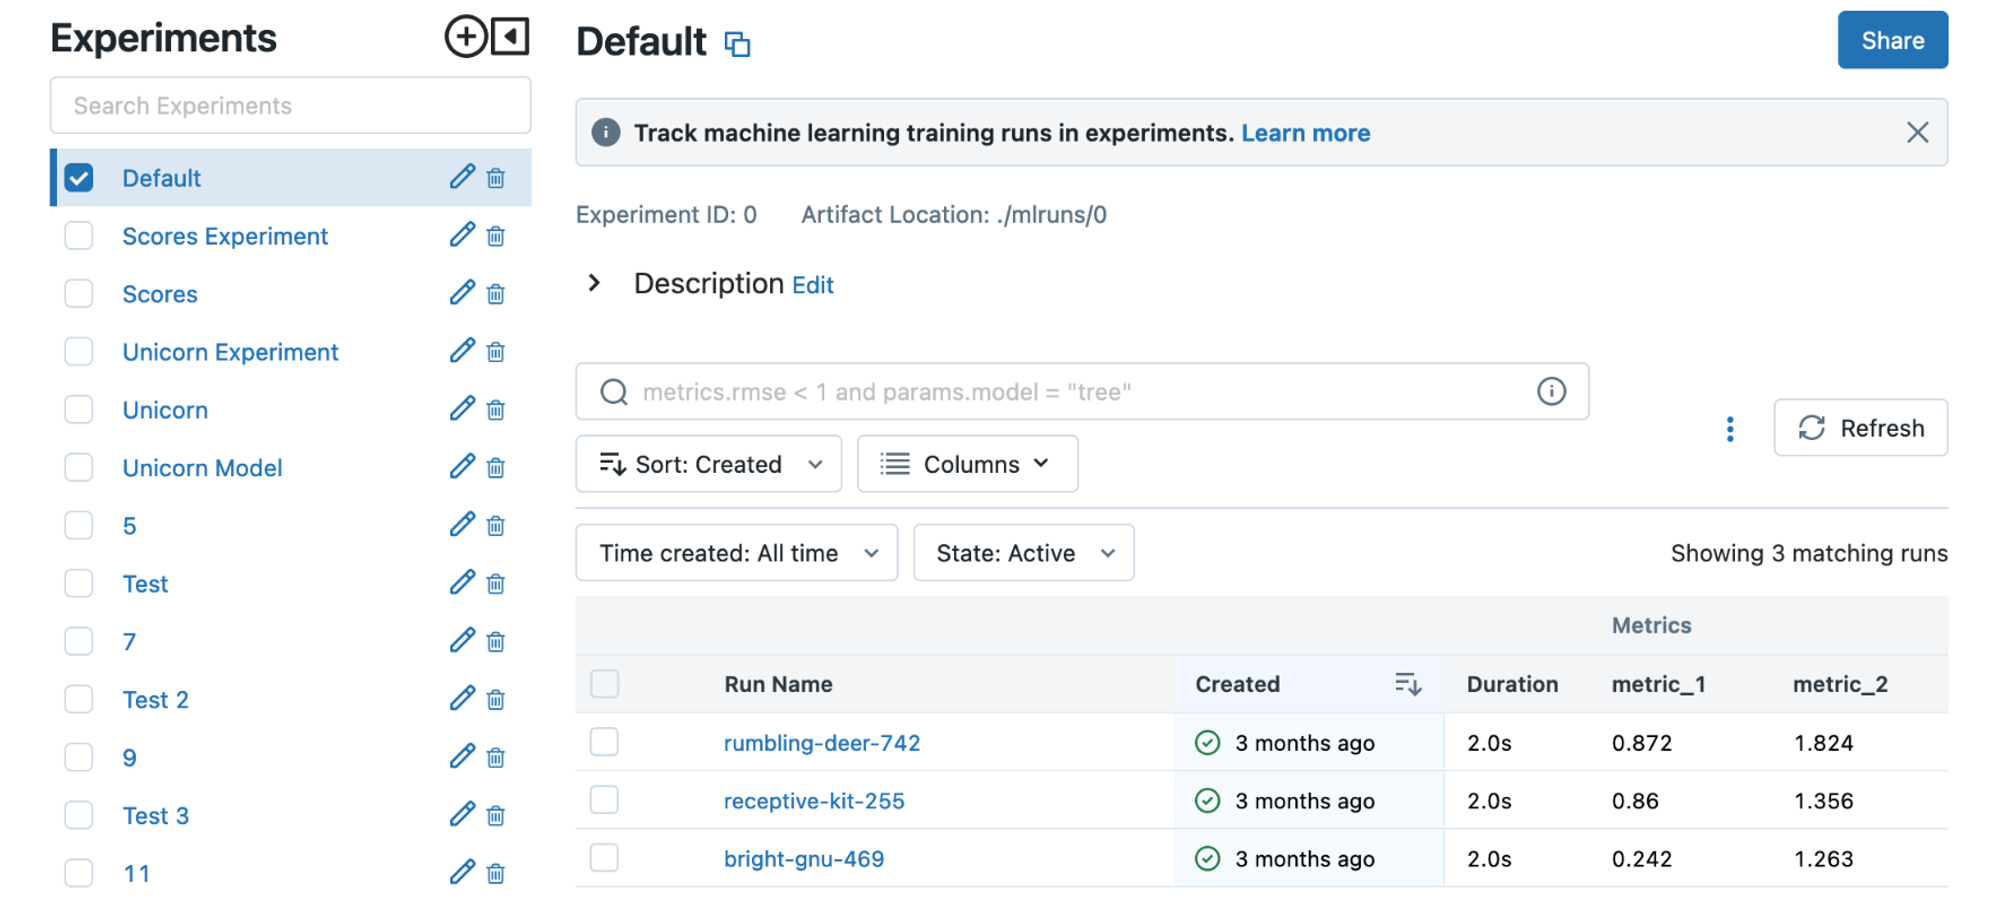

### MLFlow Tracking

Cada vez que entrenamos un modelo, ¿Cómo se supone que podamos llevar un seguimiento de las métricas de rendimiento, el código, los parámetros u otros artefactos usados durante el entrenamiento? 

MLFlow Tracking nos permite llevar un seguimiento de métricas y parámetros a través de una API, guardar artefactos como código u otro tipo de archivos.

MLFlow usa el término “logging” cuando los datos o artefactos se guardan en MLFlow Tracking.

### Runs

MLFlow Tracking está organizado alrededor de un concepto llamado **Runs**

Una nueva run equivale a al entrenamiento de un nuevo modelo y su información es registrada en MLFlow.

Una run es colocada dentro de un experimento.

## Práctica

### Configuración

In [1]:
import mlflow
from mlflow import log_metric, log_param, log_artifact

# Crear un experimento
mlflow.create_experiment("Recruitment_Experiment")

# Establecer el experimento activo
mlflow.set_experiment("Recruitment_Experiment")

# Crear una nueva run
with mlflow.start_run():
    # Registrar un parámetro (parámetros del modelo, por ejemplo)
    log_param("param1", 5)
    
    # Registrar una métrica (métricas del modelo, por ejemplo)
    log_metric("metric1", 0.85)
    
    # Registrar un artefacto (puede ser un archivo como gráficos o modelos guardados)
    with open("output.txt", "w") as f:
        f.write("Hola, este es un artefacto.")
    log_artifact("output.txt")
    
print("Run registrado en MLFlow. Puedes revisar la UI para ver los detalles.")
mlflow.end_run()

Run registrado en MLFlow. Puedes revisar la UI para ver los detalles.


### Logging con un modelo de clasificación

In [2]:
import pandas as pd

# Leer los datos
df = pd.read_csv(r"../data/raw/recruitment_data.csv")
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Separar características y la variable objetivo
X = df.drop("HiringDecision", axis=1)
y = df["HiringDecision"]

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlflow.set_experiment_tag("Library", "Scikit-learn")

# Iniciar un run en MLFlow
with mlflow.start_run():
    # Entrenamiento de un modelo
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Calcular accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Loguear métrica
    mlflow.log_metric("accuracy", accuracy)
    
    # Loguear el modelo
    mlflow.sklearn.log_model(model, "RandomForestModel")
    
    print(f"Modelo entrenado y registrado en MLFlow con accuracy: {accuracy:.4f}")

mlflow.end_run()

2024/08/18 15:44:58 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo entrenado y registrado en MLFlow con accuracy: 0.9300


### UI

In [4]:
mlflow ui

### Jugando un poco

In [6]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Lista de hiperparámetros
param_list = [{'n_estimators': 100, 'max_depth': 5}, {'n_estimators': 200, 'max_depth': 10}, {'n_estimators': 300, 'max_depth': 15}]

# Iterar sobre la lista de hiperparámetros
for params in param_list:
    # Iniciar un run en MLFlow
    with mlflow.start_run():
        # Entrenamiento de un modelo con los hiperparámetros actuales
        model = RandomForestClassifier(random_state=42, **params)
        model.fit(X_train, y_train)

        # Predicciones
        y_pred = model.predict(X_test)

        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Loguear hiperparámetros
        for key, value in params.items():
            mlflow.log_param(key, value)

        # Loguear métricas
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Loguear el modelo
        mlflow.sklearn.log_model(model, "RandomForestModel")
        
        print(f"Modelo entrenado y registrado en MLFlow con accuracy: {accuracy:.4f}, recall: {recall:.4f}, f1_score: {f1:.4f}")

mlflow.end_run()

2024/08/18 15:49:48 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo entrenado y registrado en MLFlow con accuracy: 0.9267, recall: 0.8353, f1_score: 0.8659


2024/08/18 15:49:50 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo entrenado y registrado en MLFlow con accuracy: 0.9400, recall: 0.8588, f1_score: 0.8902


2024/08/18 15:49:52 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modelo entrenado y registrado en MLFlow con accuracy: 0.9367, recall: 0.8471, f1_score: 0.8834


### Integración con Pycaret

In [8]:
from pycaret.classification import *

# Iniciar setup en PyCaret
exp1 = setup(data=df, target='HiringDecision', session_id=123, log_experiment=True, experiment_name='Recruitment_Experiment_PyCaret', log_plots=True)

# Comparar modelos
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,HiringDecision
2,Target type,Binary
3,Original data shape,"(1500, 11)"
4,Transformed data shape,"(1500, 11)"
5,Transformed train set shape,"(1050, 11)"
6,Transformed test set shape,"(450, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9343,0.9386,0.8652,0.9190,0.8895,0.8430,0.8452,0.0260
lightgbm,Light Gradient Boosting Machine,0.9314,0.9381,0.8593,0.9165,0.8852,0.8366,0.8390,0.0550
rf,Random Forest Classifier,0.9286,0.9369,0.8286,0.9345,0.8767,0.8269,0.8312,0.0330
ada,Ada Boost Classifier,0.9048,0.9251,0.8286,0.8621,0.8424,0.7745,0.7770,0.0160
et,Extra Trees Classifier,0.8886,0.9227,0.7488,0.8759,0.8054,0.7283,0.7341,0.0280
nb,Naive Bayes,0.8743,0.9013,0.6968,0.8731,0.7733,0.6882,0.6978,0.0050
qda,Quadratic Discriminant Analysis,0.8705,0.8997,0.7551,0.8160,0.7839,0.6916,0.6931,0.0050
ridge,Ridge Classifier,0.8629,0.8931,0.7028,0.8365,0.7593,0.6649,0.6732,0.0070
lr,Logistic Regression,0.8590,0.8941,0.7089,0.8185,0.7562,0.6582,0.6643,0.2550
dt,Decision Tree Classifier,0.8590,0.8422,0.7978,0.7604,0.7768,0.6740,0.6763,0.0050


2024/08/18 16:00:20 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 16:00:21 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 16:00:21 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 16:00:21 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 16:00:21 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 16:00:22 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

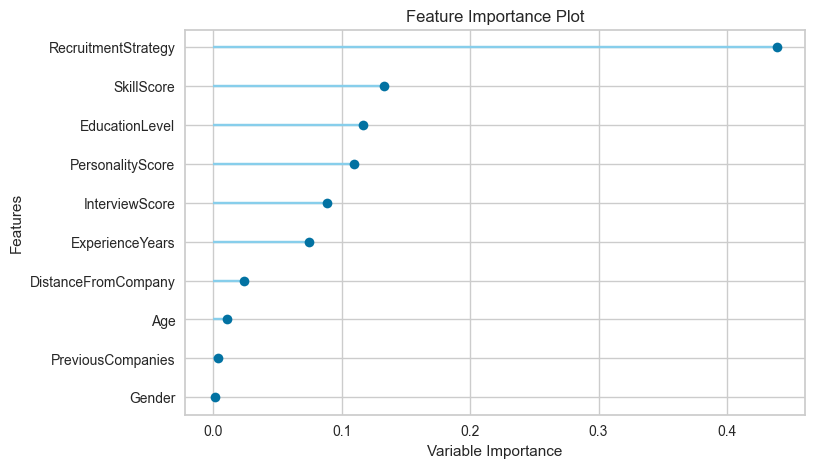

In [9]:
plot_model(best_model, plot = 'feature')

In [10]:
# Finalizar y guardar el mejor modelo
final_model = finalize_model(best_model)
save_model(final_model, 'pycaret_model')

2024/08/18 16:02:22 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Gender', 'EducationLevel',
                                              'ExperienceYears',
                                              'PreviousCompanies',
                                              'DistanceFromCompany',
                                              'InterviewScore', 'SkillScore',
                                              'PersonalityScore',
                                              'RecruitmentStrategy'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_em...
                                             criterion='friedm

In [11]:
# Registrar el modelo final en MLFlow
mlflow.sklearn.log_model(final_model, "Best_PyCaret_Model")

2024/08/18 16:03:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
